<h1>TASK 2. ANALYSIS OF MULTIVARIATE RANDOM VARIABLES</h1>

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Plotting a Non Parametric Estimation of PDF in Form of a Histogram and Using Kernel density function for MRV</a></li>
    <li><a href='#002'>Estimation of Multivariate Mathematical Expectation and Variance</a></li>
    <li><a href='#003'>Non Parametric Estimation of Conditional Distributions, Mathematical Expectations and Variances</a></li>
    <li><a href='#004'>Estimation of Pair Correlation Coefficients, Confidence Intervals for Them and Significance Levels</a></li>
    <li><a href='#005'>Task Formulation for Regression, Multivariate Correlation</a></li>
    <li><a href='#006'>Regression Model, Multicollinearity and Regularization</a></li>
    <li><a href='#007'>Quality Analysis</a></li>
    </ol>
</ul>

<h2>0. Environment Setup</h2>

<a href='#000'>Back</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
warnings.filterwarnings(action='ignore')

<a name='001'></a>

<h2>1. Plotting a Non Parametric Estimation of PDF in Form of a Histogram and Using Kernel density function for MRV</h2>

<a href='#000'>Back</a>

Dataset name: Heart Disease Data Set

Dataset source: https://www.kaggle.com/ronitf/heart-disease-uci/version/1

Dataset content:
- age of patient
- sex of patient
- chest pain type
- resting blood pressure
- serum cholestoral
- fasting blood sugar
- resting electrocardiographic results
- maximum heart rate achieved
- exercise induced angina
- ST depression induced by exercise relative to rest
- slope of the peak exercise ST segment
- number of major vessels colored by flourosopy
- thal

In [3]:
df = pd.read_csv('data/data.csv')

In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target']]

q75, q25 = np.percentile(df['age'], [75, 25])
interval = q75 - q25
min_dist = q25 - (1.5 * interval)
max_dist = q75 + (1.5 * interval)
df.loc[(df['age'] < min_dist) | (df['age'] > max_dist), ('age')] = np.nan

q75, q25 = np.percentile(df['trestbps'], [75, 25])
interval = q75 - q25
min_dist = q25 - (1.5 * interval)
max_dist = q75 + (1.5 * interval)
df.loc[(df['trestbps'] < min_dist) | (df['trestbps'] > max_dist), ('trestbps')] = np.nan

q75, q25 = np.percentile(df['chol'], [75, 25])
interval = q75 - q25
min_dist = q25 - (1.5 * interval)
max_dist = q75 + (1.5 * interval)
df.loc[(df['chol'] < min_dist) | (df['chol'] > max_dist), ('chol')] = np.nan

q75, q25 = np.percentile(df['thalach'], [75, 25])
interval = q75 - q25
min_dist = q25 - (1.5 * interval)
max_dist = q75 + (1.5 * interval)
df.loc[(df['thalach'] < min_dist) | (df['thalach'] > max_dist), ('thalach')] = np.nan

q75, q25 = np.percentile(df['oldpeak'], [75, 25])
interval = q75 - q25
min_dist = q25 - (1.5 * interval)
max_dist = q75 + (1.5 * interval)
df.loc[(df['oldpeak'] < min_dist) | (df['oldpeak'] > max_dist), ('oldpeak')] = np.nan

df.dropna(inplace=True)

In [7]:
df.head(10)

,age,sex,cp,trestbps,chol,thalach,oldpeak,ca,target
0,63.0,1,3,145.0,233.0,150.0,2.3,0,1
1,37.0,1,2,130.0,250.0,187.0,3.5,0,1
2,41.0,0,1,130.0,204.0,172.0,1.4,0,1
3,56.0,1,1,120.0,236.0,178.0,0.8,0,1
4,57.0,0,0,120.0,354.0,163.0,0.6,0,1
5,57.0,1,0,140.0,192.0,148.0,0.4,0,1
6,56.0,0,1,140.0,294.0,153.0,1.3,0,1
7,44.0,1,1,120.0,263.0,173.0,0.0,0,1
9,57.0,1,2,150.0,168.0,174.0,1.6,0,1
10,54.0,1,0,140.0,239.0,160.0,1.2,0,1


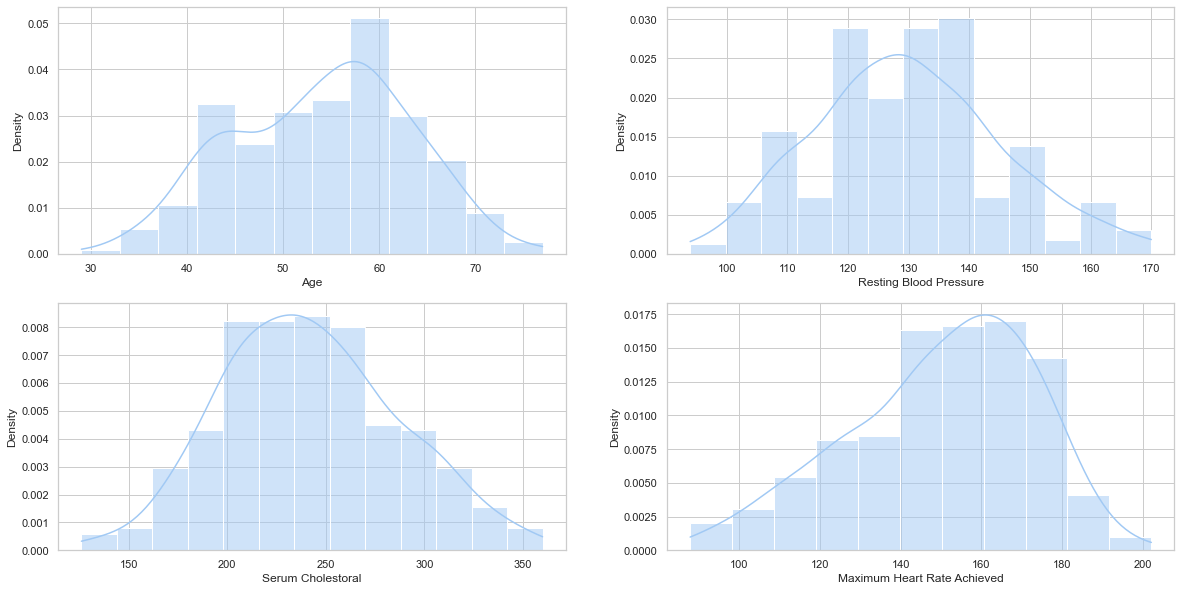

In [9]:
figure, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.set_theme(style='whitegrid', palette='pastel')

age = sns.histplot(df.age, ax=ax[0, 0], kde=True, stat='density')
age.set(xlabel='Age')

trestbps = sns.histplot(df.trestbps, ax=ax[0, 1], kde=True, stat='density')
trestbps.set(xlabel='Resting Blood Pressure')

chol = sns.histplot(df.chol, ax=ax[1, 0], kde=True, stat='density')
chol.set(xlabel='Serum Cholestoral')

thalach = sns.histplot(df.thalach, ax=ax[1, 1], kde=True, stat='density')
thalach.set(xlabel='Maximum Heart Rate Achieved')

plt.show()

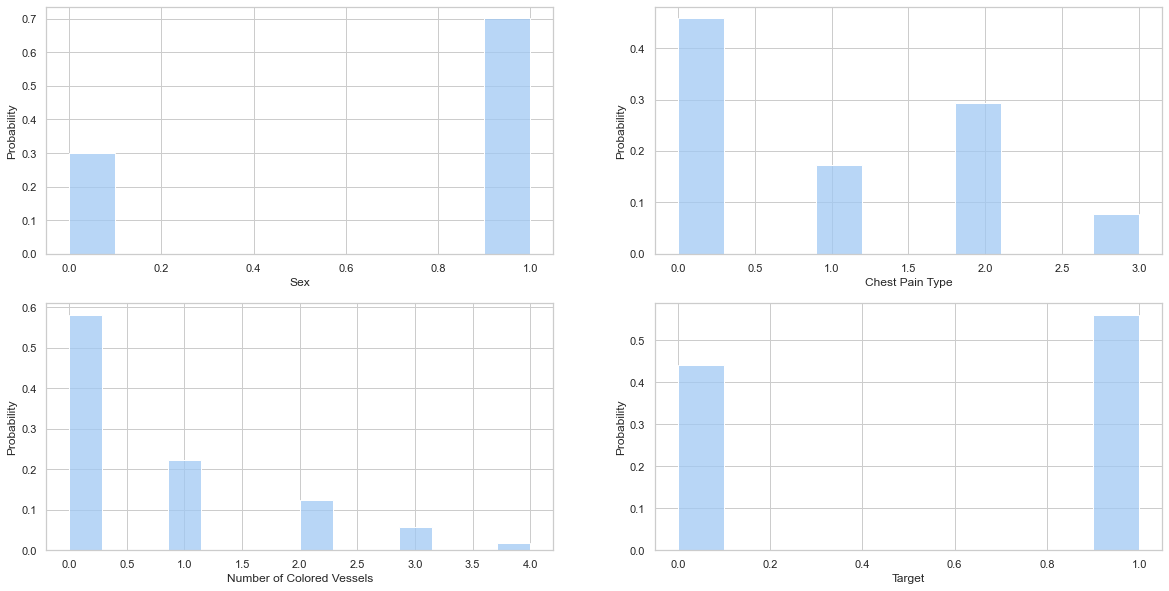

In [10]:
figure, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.set_theme(style='whitegrid', palette='pastel')

sex = sns.histplot(df.sex, ax=ax[0, 0], kde=False, stat='probability')
sex.set(xlabel='Sex')

cp = sns.histplot(df.cp, ax=ax[0, 1], kde=False, stat='probability')
cp.set(xlabel='Chest Pain Type')

ca = sns.histplot(df.ca, ax=ax[1, 0], kde=False, stat='probability')
ca.set(xlabel='Number of Colored Vessels')

target = sns.histplot(df.target, ax=ax[1, 1], kde=False, stat='probability')
target.set(xlabel='Target')

plt.show()

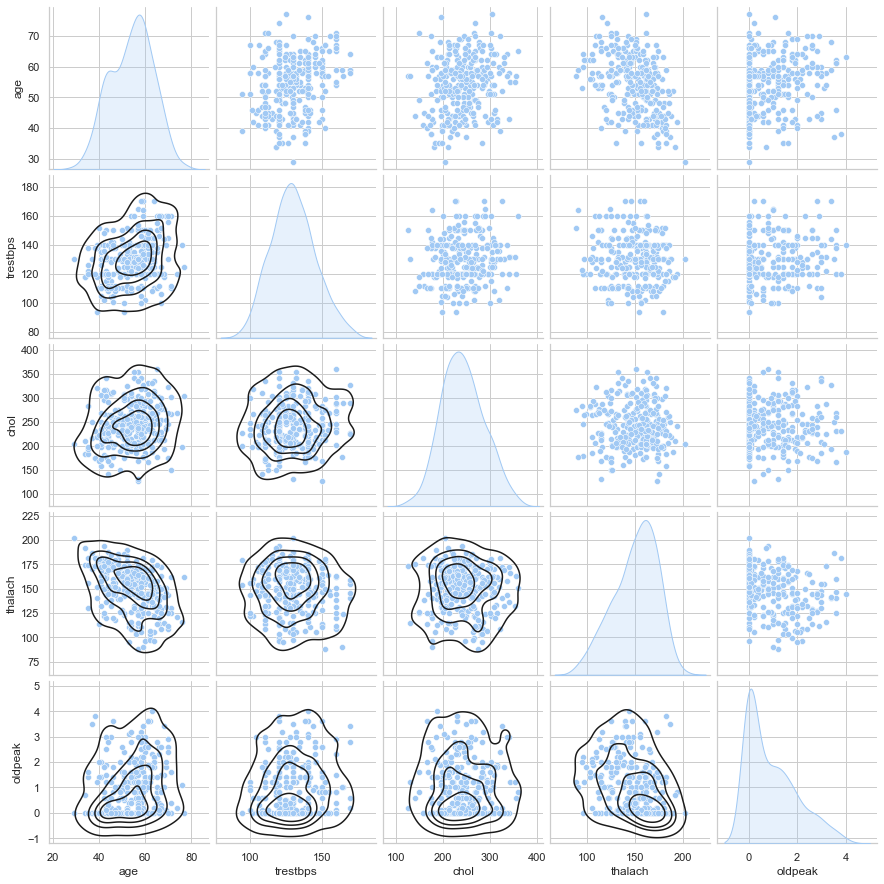

In [11]:
sns.set_theme(style='whitegrid', palette='pastel')

ax = sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']], diag_kind='kde')
ax.map_lower(sns.kdeplot, levels=5, color='.1')

plt.show()

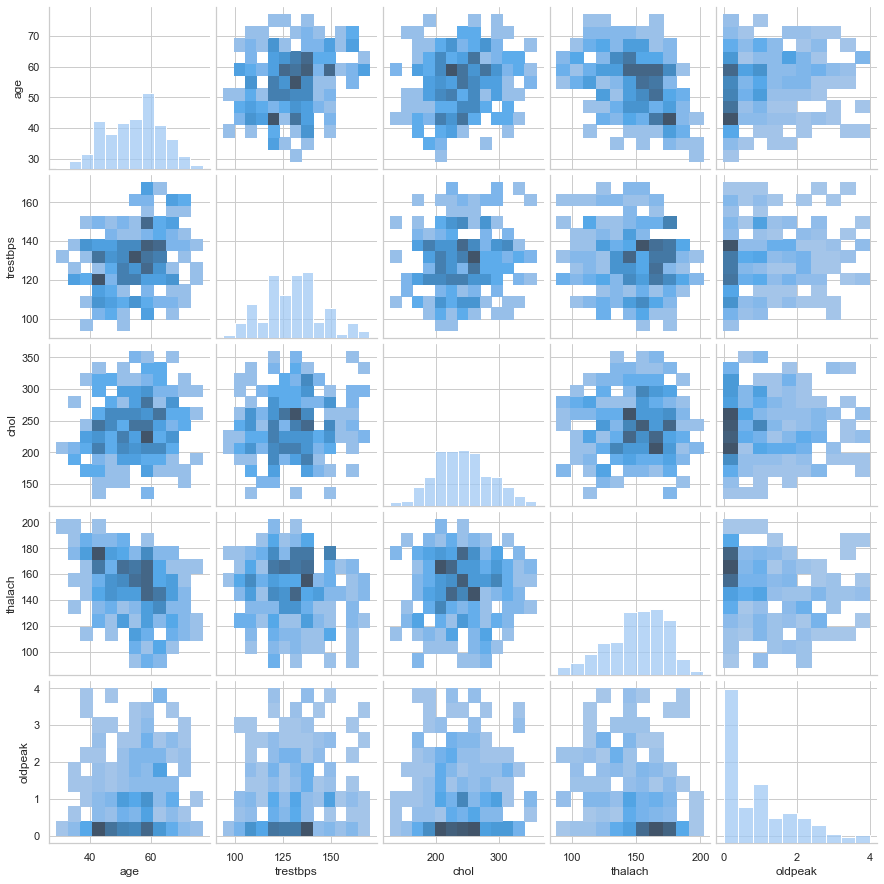

In [12]:
sns.set_theme(style='whitegrid', palette='pastel')

ax = sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']], kind='hist', diag_kind='hist')

plt.show()

<a name='002'></a>

<h2>2. Estimation of Multivariate Mathematical Expectation and Variance</h2>

<a href='#000'>Back</a>

In [12]:
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].mean()

age          53.992958
trestbps    129.911972
chol        242.077465
thalach     150.042254
oldpeak       0.948592
dtype: float64

In [13]:
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].var()

age           83.936346
trestbps     236.179503
chol        2002.905639
thalach      514.959339
oldpeak        1.052966
dtype: float64

<a name='003'></a>

<h2>3. Non Parametric Estimation of Conditional Distributions, Mathematical Expectations and Variances</h2>

<a href='#000'>Back</a>

In [14]:
df_conditional = df[df.target == 1]
df_conditional.head(10)

,age,sex,cp,trestbps,chol,thalach,oldpeak,ca,target
0,63.0,1,3,145.0,233.0,150.0,2.3,0,1
1,37.0,1,2,130.0,250.0,187.0,3.5,0,1
2,41.0,0,1,130.0,204.0,172.0,1.4,0,1
3,56.0,1,1,120.0,236.0,178.0,0.8,0,1
4,57.0,0,0,120.0,354.0,163.0,0.6,0,1
5,57.0,1,0,140.0,192.0,148.0,0.4,0,1
6,56.0,0,1,140.0,294.0,153.0,1.3,0,1
7,44.0,1,1,120.0,263.0,173.0,0.0,0,1
9,57.0,1,2,150.0,168.0,174.0,1.6,0,1
10,54.0,1,0,140.0,239.0,160.0,1.2,0,1


In [15]:
df_conditional[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].mean()

age          52.157233
trestbps    128.364780
chol        237.729560
thalach     158.566038
oldpeak       0.552830
dtype: float64

In [16]:
df_conditional[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].var()

age           90.563729
trestbps     224.942043
chol        1901.970703
thalach      380.209219
oldpeak        0.537444
dtype: float64

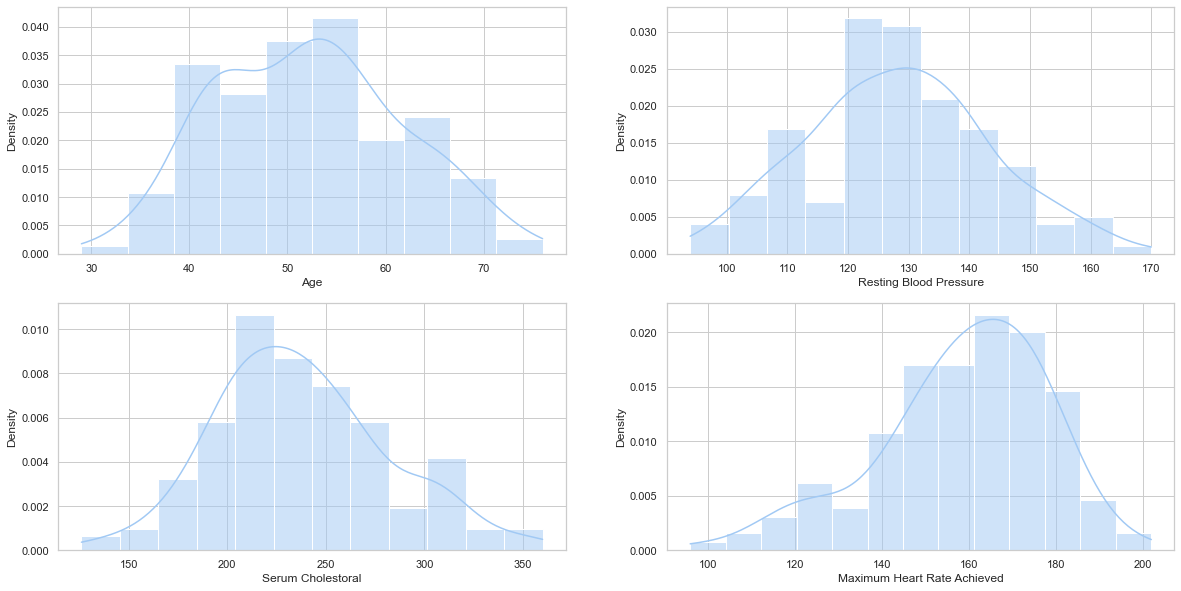

In [17]:
figure, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.set_theme(style='whitegrid', palette='pastel')

age = sns.histplot(df_conditional.age, ax=ax[0, 0], kde=True, stat='density')
age.set(xlabel='Age')

trestbps = sns.histplot(df_conditional.trestbps, ax=ax[0, 1], kde=True, stat='density')
trestbps.set(xlabel='Resting Blood Pressure')

chol = sns.histplot(df_conditional.chol, ax=ax[1, 0], kde=True, stat='density')
chol.set(xlabel='Serum Cholestoral')

thalach = sns.histplot(df_conditional.thalach, ax=ax[1, 1], kde=True, stat='density')
thalach.set(xlabel='Maximum Heart Rate Achieved')

plt.show()

In [18]:
df_conditional = df[df.target == 0]
df_conditional.head(10)

,age,sex,cp,trestbps,chol,thalach,oldpeak,ca,target
165,67.0,1,0,160.0,286.0,108.0,1.5,3,0
166,67.0,1,0,120.0,229.0,129.0,2.6,2,0
167,62.0,0,0,140.0,268.0,160.0,3.6,2,0
168,63.0,1,0,130.0,254.0,147.0,1.4,1,0
169,53.0,1,0,140.0,203.0,155.0,3.1,0,0
170,56.0,1,2,130.0,256.0,142.0,0.6,1,0
171,48.0,1,1,110.0,229.0,168.0,1.0,0,0
172,58.0,1,1,120.0,284.0,160.0,1.8,0,0
173,58.0,1,2,132.0,224.0,173.0,3.2,2,0
174,60.0,1,0,130.0,206.0,132.0,2.4,2,0


In [19]:
df_conditional[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].mean()

age          56.328
trestbps    131.880
chol        247.608
thalach     139.200
oldpeak       1.452
dtype: float64

In [20]:
df_conditional[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].var()

age           66.351226
trestbps     245.429032
chol        2092.595097
thalach      479.145161
oldpeak        1.262032
dtype: float64

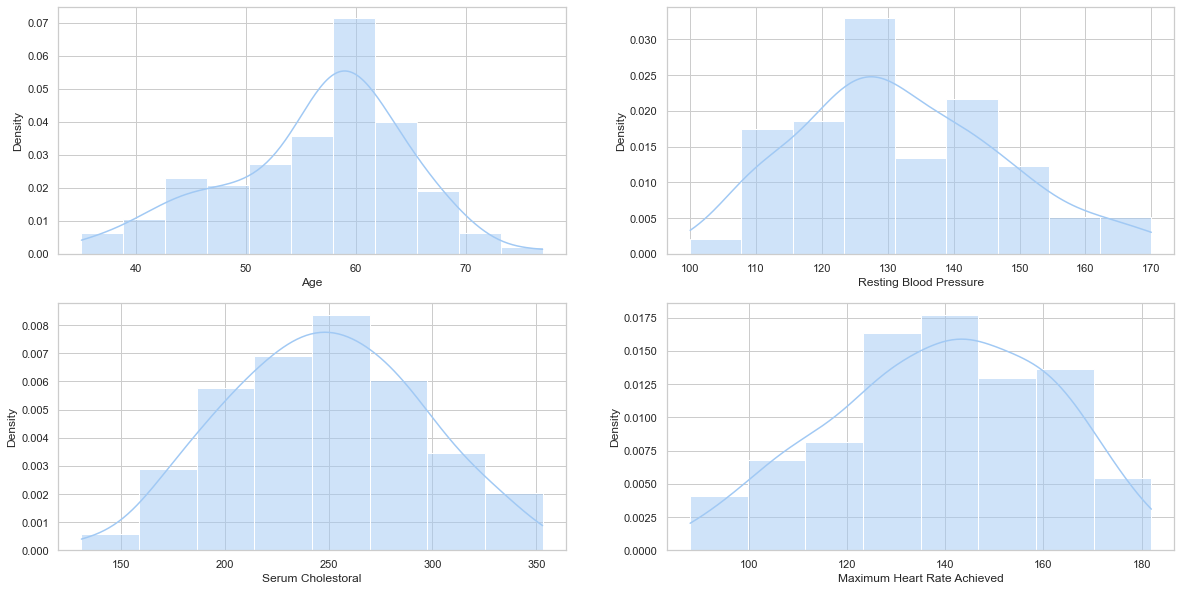

In [21]:
figure, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.set_theme(style='whitegrid', palette='pastel')

age = sns.histplot(df_conditional.age, ax=ax[0, 0], kde=True, stat='density')
age.set(xlabel='Age')

trestbps = sns.histplot(df_conditional.trestbps, ax=ax[0, 1], kde=True, stat='density')
trestbps.set(xlabel='Resting Blood Pressure')

chol = sns.histplot(df_conditional.chol, ax=ax[1, 0], kde=True, stat='density')
chol.set(xlabel='Serum Cholestoral')

thalach = sns.histplot(df_conditional.thalach, ax=ax[1, 1], kde=True, stat='density')
thalach.set(xlabel='Maximum Heart Rate Achieved')

plt.show()

<a name='004'></a>

<h2>4. Estimation of Pair Correlation Coefficients, Confidence Intervals for Them and Significance Levels</h2>

<a href='#000'>Back</a>

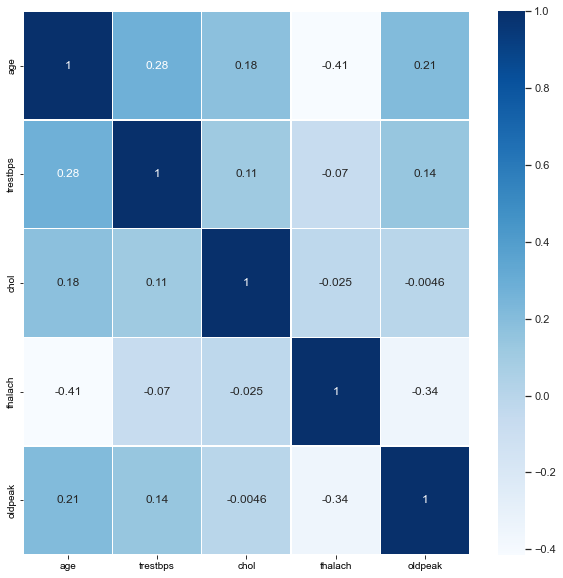

In [8]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

sns.heatmap(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].corr(), cmap='Blues', annot=True, linewidths=0.25)

plt.show()

In [9]:
def return_estimation(array, target, alpha=0.05):
    r, pvalue = scipy.stats.pearsonr(array, target)
    
    r_to_z = np.arctanh(r)
    se = 1 / np.sqrt(array.count() - 3)
    z = scipy.stats.norm.ppf(1 - alpha / 2)
    int_a, int_b = r_to_z - z * se, r_to_z + z * se
    int_a, int_b = np.tanh(int_a), np.tanh(int_b)
    
    print('Confidence Interval: ({:.4f}, {:.4f})'.format(int_a, int_b))
    print('Significance Level: {:.6f}'.format(pvalue))
    print('Correlation Coefficient: {:.4f}'.format(r))

Pair Serum Cholesterol-Sex.

In [10]:
return_estimation(df.chol, df.sex)

Confidence Interval: (-0.2396, -0.0105)
Significance Level: 0.032753
Correlation Coefficient: -0.1267


Pair Serum Cholesterol-Resting Blood Pressure.

In [11]:
return_estimation(df.chol, df.trestbps)

Confidence Interval: (-0.0046, 0.2253)
Significance Level: 0.059821
Correlation Coefficient: 0.1118


Pair Serum Cholesterol-Exercise Relative to Rest.

In [12]:
return_estimation(df.chol, df.oldpeak)

Confidence Interval: (-0.1209, 0.1119)
Significance Level: 0.938907
Correlation Coefficient: -0.0046


<a name='005'></a>

<h2>5. Task Formulation for Regression, Multivariate Correlation</h2>

<a href='#000'>Back</a>

<h3>Goal</h3>

Training a model for predicting patient age by patient resting blood pressure, maximum heart rate achieved, exercise relative to rest results.

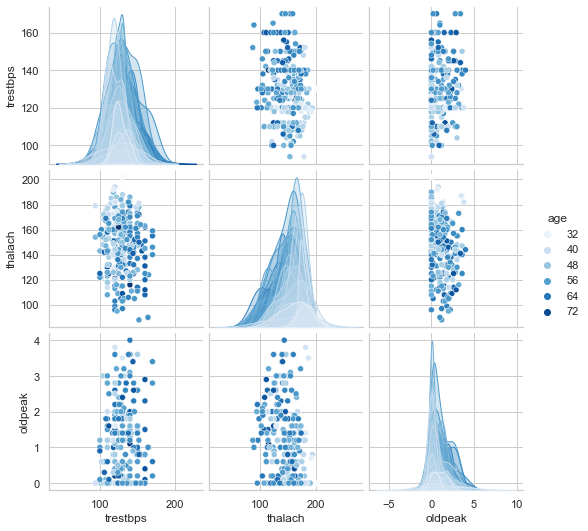

In [43]:
sns.set_theme(style='whitegrid', palette='pastel')

sns.pairplot(df[['age', 'trestbps', 'thalach', 'oldpeak']], hue='age', kind='scatter', palette='Blues')

plt.show()

<a name='006'></a>

<h2>6. Regression Model, Multicollinearity and Regularization</h2>

<a href='#000'>Back</a>

In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    df[['oldpeak', 'trestbps', 'thalach']],
    df['age']
)

In [29]:
x_train.head(10)

,oldpeak,trestbps,thalach
254,0.0,160.0,125.0
255,0.0,142.0,147.0
302,0.0,130.0,174.0
7,0.0,120.0,173.0
114,0.0,130.0,155.0
67,0.6,130.0,175.0
60,0.0,110.0,130.0
91,0.0,132.0,168.0
218,2.8,135.0,127.0
49,0.0,138.0,160.0


In [30]:
y_train.head(10)

254    59.0
255    45.0
302    57.0
7      44.0
114    55.0
67     45.0
60     71.0
91     57.0
218    65.0
49     53.0
Name: age, dtype: float64

Training a Lars model for predicting patient serum cholesterol.

In [31]:
lars = Lars()
lars.fit(x_train, y_train)

mae = mean_absolute_error(y_test, lars.predict(x_test))
mse = mean_squared_error(y_test, lars.predict(x_test))
r2 = r2_score(y_test, lars.predict(x_test))

print('Mean Absolute Error: {:.3f}'.format(mae))
print('Mean Squared Error: {:.3f}'.format(mse))
print('R2 Score: {:.3f}'.format(r2))

Mean Absolute Error: 6.607
Mean Squared Error: 61.304
R2 Score: 0.290


Training a LinearRegression model for predicting patient serum cholesterol.

In [32]:
lregressor = LinearRegression()
lregressor.fit(x_train, y_train)

mae = mean_absolute_error(y_test, lregressor.predict(x_test))
mse = mean_squared_error(y_test, lregressor.predict(x_test))
r2 = r2_score(y_test, lregressor.predict(x_test))

print('Mean Absolute Error: {:.3f}'.format(mae))
print('Mean Squared Error: {:.3f}'.format(mse))
print('R2 Score: {:.3f}'.format(r2))

Mean Absolute Error: 6.607
Mean Squared Error: 61.304
R2 Score: 0.290


Training a ElasticNet model for predicting patient serum cholesterol.

In [33]:
elastic = ElasticNet()
elastic.fit(x_train, y_train)

mae = mean_absolute_error(y_test, elastic.predict(x_test))
mse = mean_squared_error(y_test, elastic.predict(x_test))
r2 = r2_score(y_test, elastic.predict(x_test))

print('Mean Absolute Error: {:.3f}'.format(mae))
print('Mean Squared Error: {:.3f}'.format(mse))
print('R2 Score: {:.3f}'.format(r2))

Mean Absolute Error: 6.681
Mean Squared Error: 61.725
R2 Score: 0.285


<a name='007'></a>

<h2>7. Quality Analysis</h2>

<a href='#000'>Back</a>

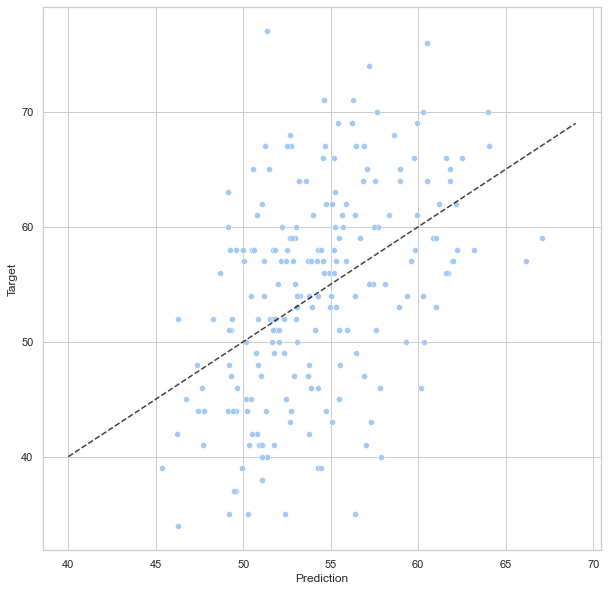

In [34]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

y_logits = np.array(lregressor.predict(x_train))
y_target = np.array(y_train)

sns.scatterplot(y_logits, y_target, ax=ax)
sns.lineplot(range(40, 70), range(40, 70), color='black', linestyle='--', alpha=0.75, ax=ax)

plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()

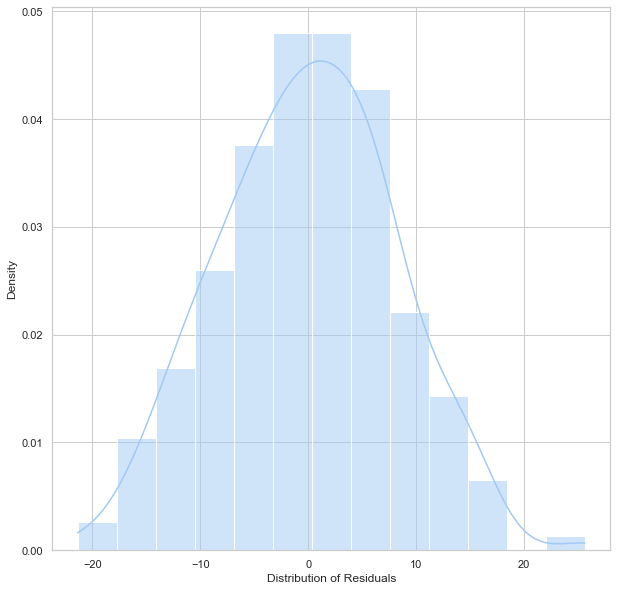

In [35]:
data = y_target - y_logits

figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

residuals = sns.histplot(data, ax=ax, kde=True, stat='density')
residuals.set(xlabel='Distribution of Residuals')

plt.show()

In [36]:
def return_test(array, distribution, cdf):
    args = distribution.fit(array)
    
    kstest = scipy.stats.kstest(array, cdf=cdf, args=args).pvalue
    cramervonmises = scipy.stats.cramervonmises(array, cdf=cdf, args=args).pvalue
    
    print('Kolmogorov-Smirnov Test: {:.5f}'.format(kstest))
    print('Cramer–Von Mises Test: {:.5f}'.format(cramervonmises))

In [37]:
return_test(data, distribution=scipy.stats.norm, cdf='norm')

Kolmogorov-Smirnov Test: 0.98795
Cramer–Von Mises Test: 0.98962


In [38]:
def return_biplot(array, distribution):
    figure, ax = plt.subplots(1, 1, figsize=(5, 5))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    args = distribution.fit(array)
    scipy.stats.probplot(array, dist=distribution, sparams=(args), plot=ax)
    
    ax.get_lines()[0].set_marker('o')
    
    ax.get_lines()[1].set_ls('--')
    ax.get_lines()[1].set_color('black')
    ax.get_lines()[1].set_linewidth(0.75)
    
    plt.show()

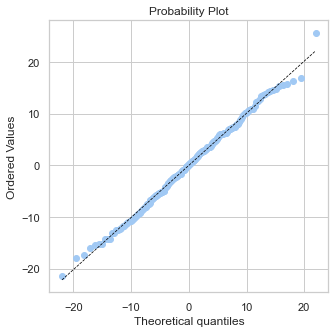

In [39]:
return_biplot(data, distribution=scipy.stats.norm)

In [40]:
data.mean()

4.436722246764945e-15

In [41]:
data.var()

65.2196978446145